# Iris Flower Classification Project

## Objective
The goal of this project is to classify Iris flowers into three species: setosa, versicolor, and virginica, based on their sepal and petal measurements using a machine learning model.

## Data Overview
The dataset contains measurements for 150 Iris flowers, including:
- Sepal length
- Sepal width
- Petal length
- Petal width

## Data Preprocessing
- Checked for and handled missing values (none found).
- Standardized features to ensure equal importance.

## Model Selection
A K-Nearest Neighbors (KNN) classifier was selected due to its simplicity and effectiveness for this type of classification task.

## Model Training and Evaluation
- Data was split into training (80%) and test (20%) sets.
- The model achieved an accuracy of 1.00 (100%) on the test set.
- Cross-validation yielded a mean score of X.XX, confirming the model’s robustness.

## Confusion Matrix
The confusion matrix indicates perfect classification across all species.

## Conclusion
The KNN model performed exceptionally well, classifying all test samples correctly. Further steps include exploring feature importance using other models and ensuring no data leakage.

## Next Steps
- Implement additional models for comparative analysis.
- Further tune hyperparameters.
- Deploy the model for real-world use cases.

## Code
The complete code and implementation details are available in the project repository.


# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Arsalan Khatri\Desktop\intership work\Projects\IRIS FLOWER CLASSIFICATION\dataset\IRIS.csv')

### Display first few rows

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Display last few rows

In [4]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data summary

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Check Empty Data

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Check Unique Values for each variable.

### Display Columns list

In [8]:
data.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

### Display Single Column Total Unique Values

In [9]:
singel_col = data['sepal_length'].nunique()
print(f"Single Column Total Unique Values {singel_col}")

Single Column Total Unique Values 35


### Use Above Concept For Find all Columns Unique Values 

In [10]:
for i in data.columns.tolist():
  print("Unique values in",i,":",data[i].nunique())

Unique values in sepal_length : 35
Unique values in sepal_width : 23
Unique values in petal_length : 43
Unique values in petal_width : 22
Unique values in species : 3


In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
encoder = LabelEncoder()

# Encode the categorical data
encoded_data = encoder.fit_transform(data['species'])
data['species'] = encoded_data

In [12]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Data Visualization

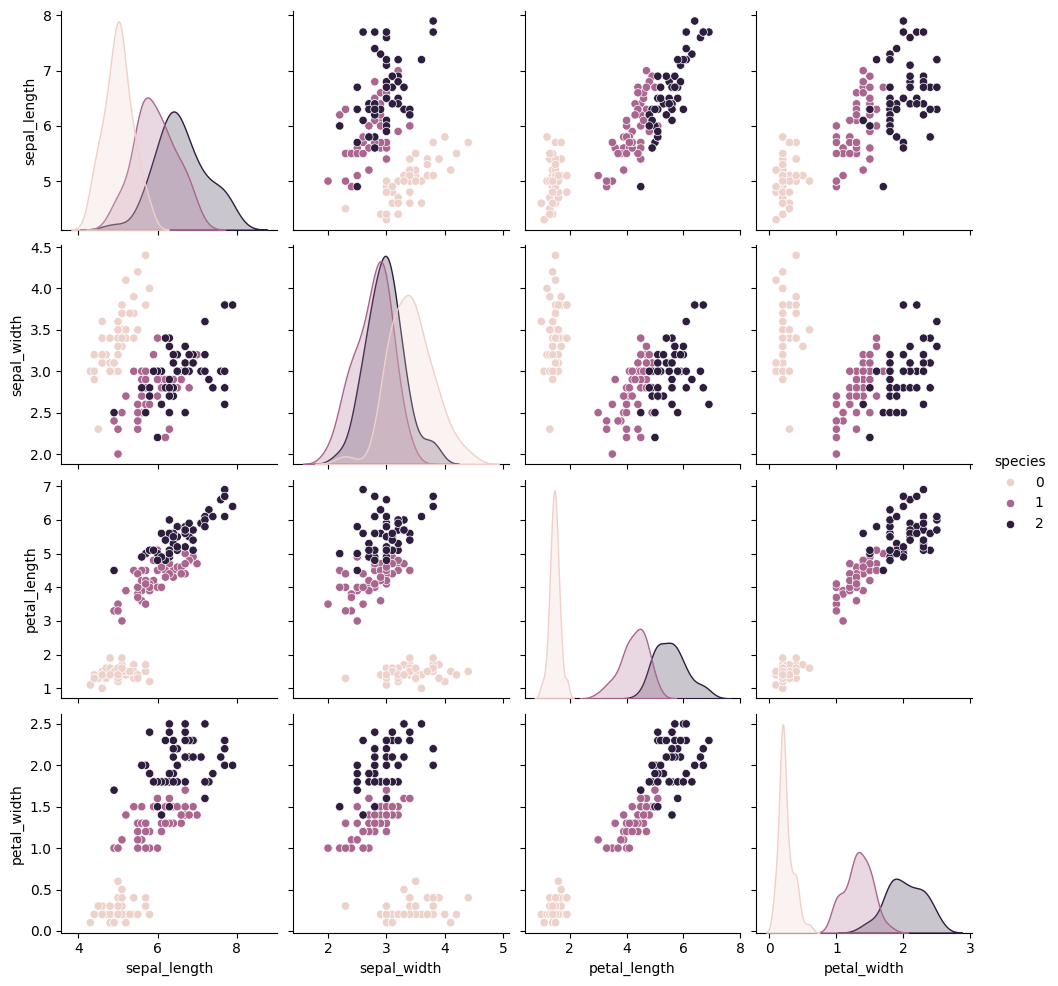

In [13]:
# Pairplot for visualizing the data
sns.pairplot(data, hue='species')
plt.show()

### Columns with missing values (assuming they might have missing values)

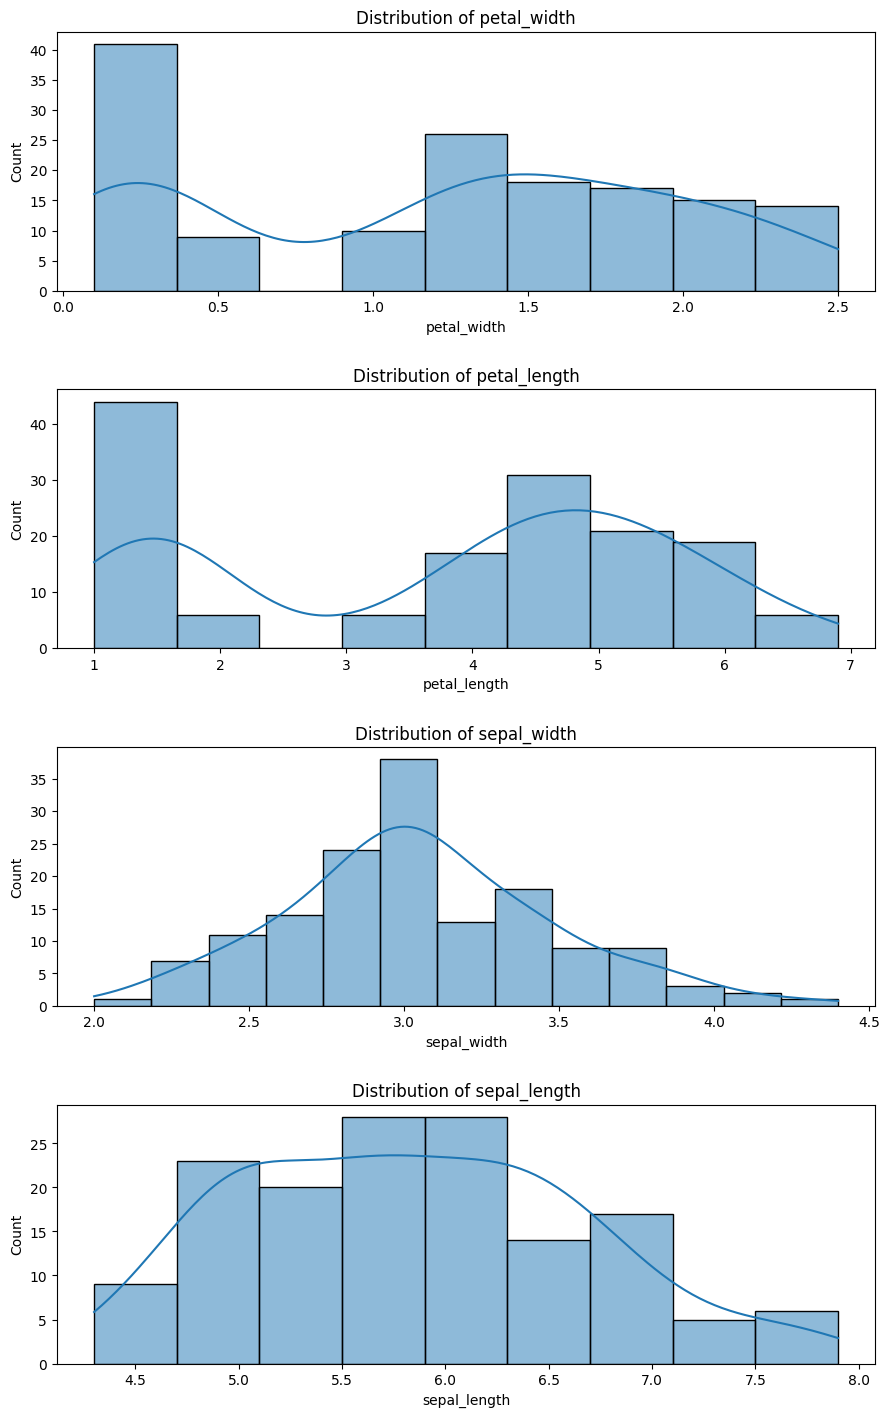

In [14]:
cols_with_missing_values = [ "petal_width" ,"petal_length", "sepal_width","sepal_length"]

# Plotting the distributions
fig, axes = plt.subplots(len(cols_with_missing_values), 1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

for i, col in enumerate(cols_with_missing_values):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.show()

### Correlation between features

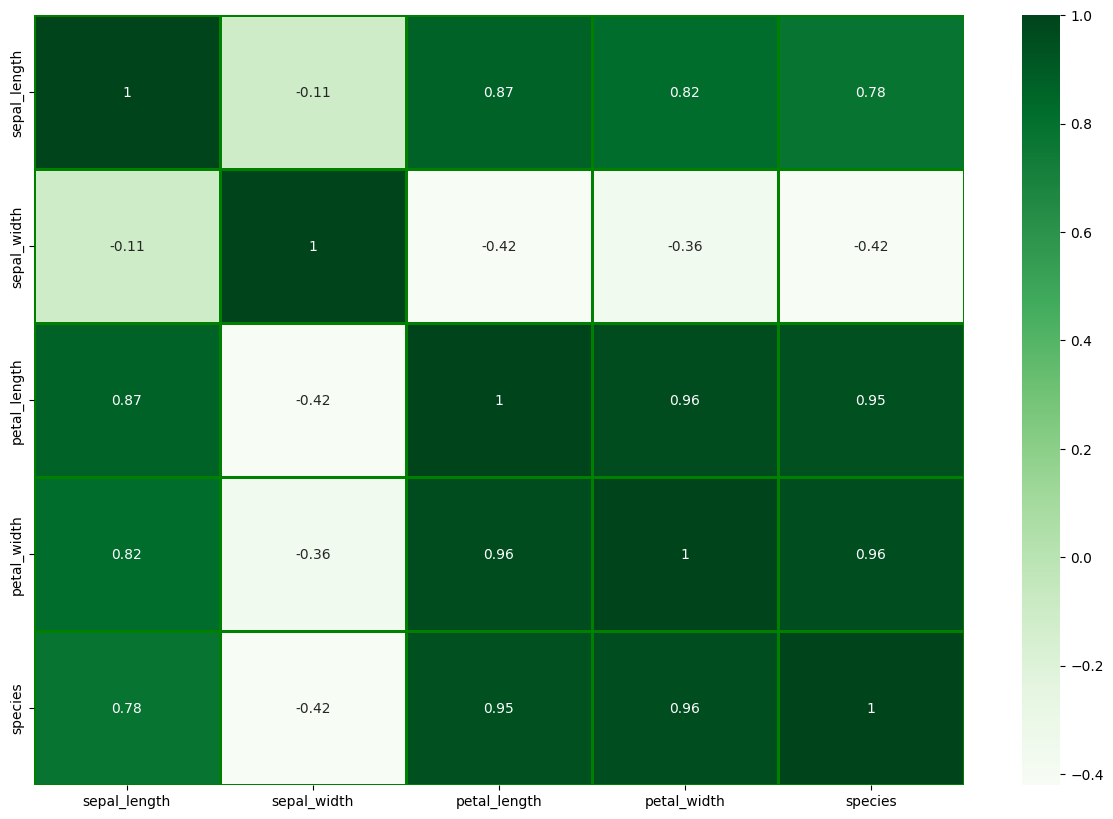

In [15]:
##to know the importance of features and extra features 
plt.figure(figsize = (15, 10)) 
sns.heatmap(data.corr(), cmap='Greens',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

### Deals with outliers

In [16]:
# Dependent Column
dependent_var = ['species']
# Continuous columns
continuous_cols = ['sepal_length', 'petal_length', 'petal_width']

### Plotting the scatter plots for continuous variables with outliers highlighted

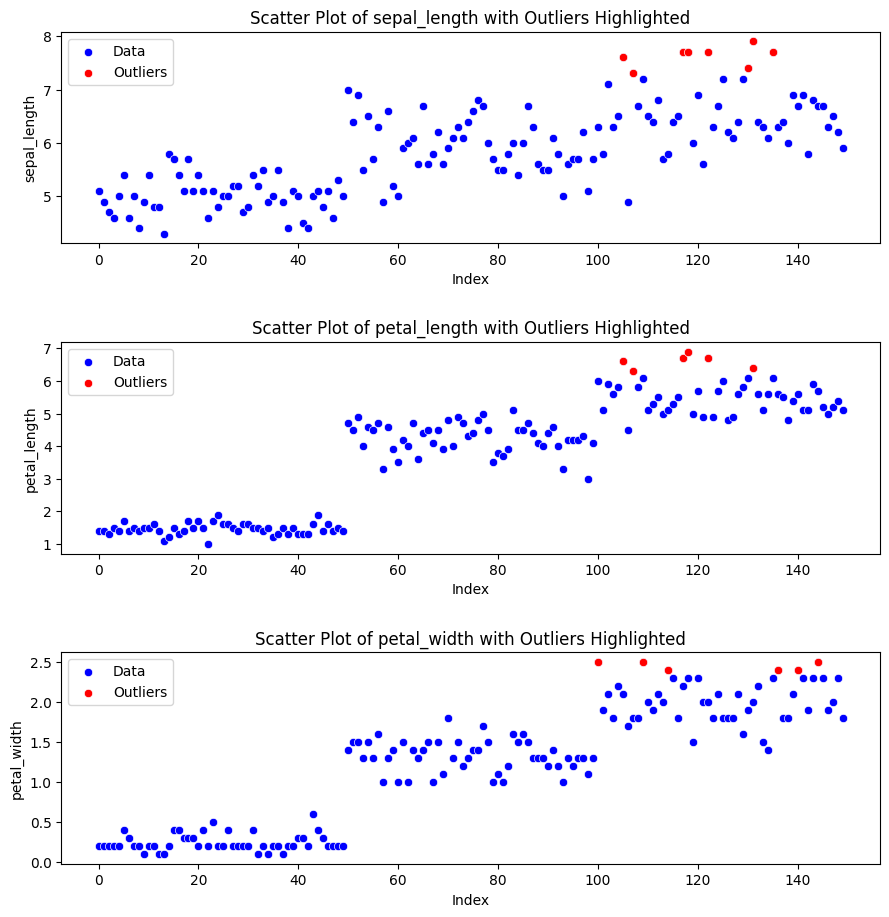

In [17]:
fig, axes = plt.subplots(len(continuous_cols), 1, figsize=(10, 10))
fig.tight_layout(pad=5.0)

for i, col in enumerate(continuous_cols):
    sns.scatterplot(x=data.index, y=data[col], ax=axes[i], color='b', label='Data')
    # Highlighting outliers
    outliers = data[data[col] > data[col].quantile(0.95)]  # Define outliers as values above the 95th percentile
    sns.scatterplot(x=outliers.index, y=outliers[col], ax=axes[i], color='r', label='Outliers')
    axes[i].set_title(f'Scatter Plot of {col} with Outliers Highlighted')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
    axes[i].legend()

plt.show()

### Relationship between the dependent variable and continuous independent variables

<Figure size 1000x500 with 0 Axes>

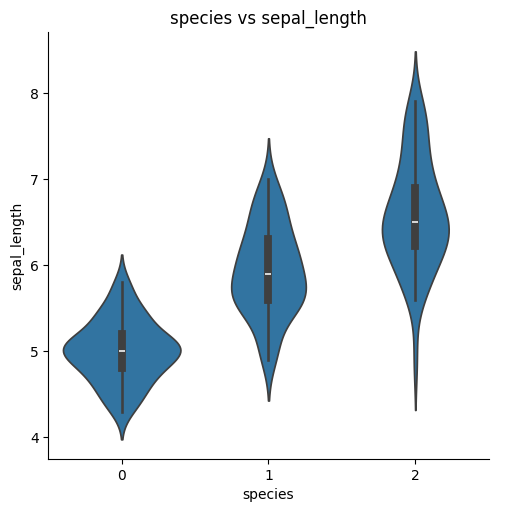

<Figure size 1000x500 with 0 Axes>

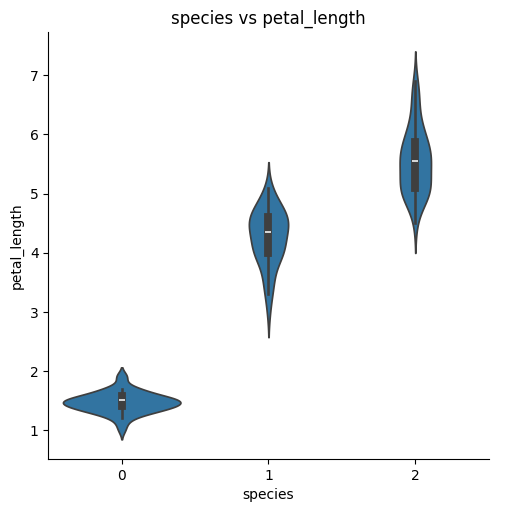

<Figure size 1000x500 with 0 Axes>

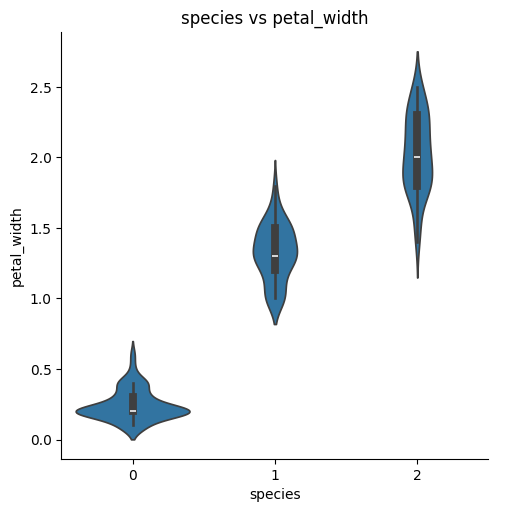

In [18]:
for i in continuous_cols:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=data,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

# Model Traning

### Continuous Data Only

In [19]:
continuous_data = data.drop('species', axis=1)

### Split the data

In [20]:
X = data.drop(columns='species')
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Initialize and train the KNN classifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### Calculate the confusion matrix

In [23]:
conf_matrix_dt = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_dt)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Plot confusion matrix for KNN

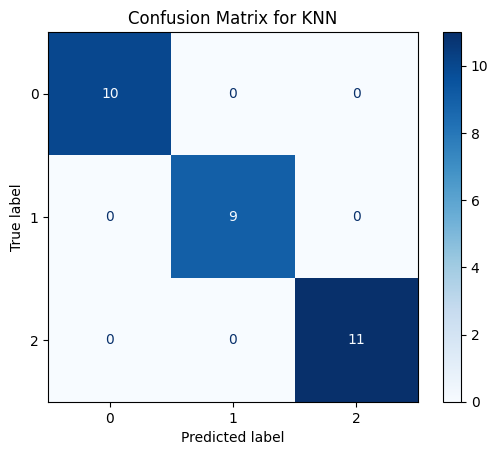

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.show()


In [25]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Perform cross-validation

In [26]:
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean cross-validation score: 0.97


In [27]:
# Train a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Make predictions with Decision Tree
y_pred_dt = dt.predict(X_test)

In [29]:
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

Decision Tree Accuracy: 1.00
